In [1]:
import UWGeodynamics as GEO
import matplotlib.pyplot as plt
import numpy as np
import underworld as uw
import underworld.function as fn
import glucifer

u = GEO.UnitRegistry

loaded rc file /opt/UWGeodynamics/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


In [2]:
half_rate     = 1. * u.centimeter / u.year 
model_length  = 40. * u.kilometer
model_height  = 24. * u.kilometer
#topTemp       = 0+273
#baseTemp      = 100+213
surfaceTemp   = 273.15 * u.degK
baseModelTemp = 360* u.degK # no data 
bodyforce     = 3300 * u.kilogram / u.metre**3 * 9.81 * u.meter / u.second**2 # 1530

KL = model_length
Kt = KL / half_rate
KM = bodyforce * KL**2 * Kt**2
KT = (baseModelTemp - surfaceTemp)


GEO.scaling_coefficients["[length]"]      = KL
GEO.scaling_coefficients["[time]"]        = Kt
GEO.scaling_coefficients["[mass]"]        = KM
GEO.scaling_coefficients["[temperature]"] = KT



In [3]:
resolution = (256,128)

Model = GEO.Model(elementRes=resolution, 
                  minCoord=(0. * u.kilometer, -11.4 * u.kilometer), 
                  maxCoord=(40. * u.kilometer, 12.6 * u.kilometer),
                  gravity=(0.0, -9.81 * u.meter / u.second**2))

Model.outputDir="outputs_mixe4"


# In[6]:

Model.minViscosity  = 1e18 * u.pascal * u.second
Model.maxViscosity  = 5e23 * u.pascal * u.second
Model.stressLimiter = 500. * u.megapascal
Model.diffusivity   = 1e-6 * u.metre**2 / u.second
Model.capacity      = 1000. * u.joule / (u.kelvin * u.kilogram)
# Model.minViscosity = 1.0e5 * u.pascal * u.second
# Model.maxViscosity = 1e12 * u.pascal * u.second

In [4]:
# polygons

era_polygon      = GEO.shapes.Polygon(vertices=[(0.* u.kilometer, -0.2*u.kilometer),
                                                (40.* u.kilometer, 0.*u.kilometer),
                                                (40.* u.kilometer, -2.4*u.kilometer),
                                                (0.* u.kilometer, -2.9*u.kilometer)])

orubadi_polygon  = GEO.shapes.Polygon(vertices=[(0.* u.kilometer, -2.9*u.kilometer),
                                                (40.* u.kilometer, -2.4*u.kilometer),
                                                (40.* u.kilometer, -4.7*u.kilometer),
                                                (0.* u.kilometer, -4.9*u.kilometer)])

aure_polygon     = GEO.shapes.Polygon(vertices=[(29.37* u.kilometer, -4.8*u.kilometer),
                                                (40.* u.kilometer, -4.2*u.kilometer),
                                                (40.* u.kilometer, -4.7*u.kilometer)])

puri_polygon     = GEO.shapes.Polygon(vertices=[(0.*u.kilometer, -4.9*u.kilometer),
                                                (40* u.kilometer, -4.7*u.kilometer),
                                                (40.* u.kilometer, -5.2*u.kilometer),
                                                (0.* u.kilometer, -5.4*u.kilometer)])

mesozoic_polygon = GEO.shapes.Polygon(vertices=[(0.*u.kilometer, -5.4*u.kilometer),
                                                (40* u.kilometer, -5.2*u.kilometer),
                                                (40.* u.kilometer, -9.6*u.kilometer),
                                                (0.* u.kilometer, -9.6*u.kilometer)])

basement_polygon = GEO.shapes.Polygon(vertices=[(0.*u.kilometer, -6.4*u.kilometer),
                                                (22.5* u.kilometer, -7.4*u.kilometer),
                                                (26.* u.kilometer, -9.4*u.kilometer),
                                                (40* u.kilometer, -9.6*u.kilometer),
                                                (40.* u.kilometer, -16.*u.kilometer),
                                                (0.* u.kilometer, -16.*u.kilometer)])

decollement_orubadi_polygon = GEO.shapes.Polygon(vertices=[(0.*u.kilometer, -3.9*u.kilometer),
                                                (40.* u.kilometer, -3.7*u.kilometer),
                                                (40.* u.kilometer, -3.8*u.kilometer),
                                                (0.* u.kilometer, -4.*u.kilometer)])

decollement1_mesozoic_polygon = GEO.shapes.Polygon(vertices=[(0.*u.kilometer, -5.9*u.kilometer),
                                                (40.* u.kilometer, -6.1*u.kilometer),
                                                (40.* u.kilometer, -6.2*u.kilometer),
                                                (0.* u.kilometer, -6.*u.kilometer)])

decollement2_mesozoic_polygon = GEO.shapes.Polygon(vertices=[(23.*u.kilometer, -8.9*u.kilometer),
                                                (40.* u.kilometer, -9.1*u.kilometer),
                                                (40.* u.kilometer, -9.2*u.kilometer),
                                                (23.* u.kilometer, -9.*u.kilometer)])

carbonate_polygon = GEO.shapes.Polygon(vertices=[(21.6*u.kilometer, -4.8*u.kilometer),
                                                (22.2* u.kilometer, -4.3*u.kilometer),
                                                (28.125* u.kilometer, -4.3*u.kilometer),
                                                (29.37* u.kilometer, -4.8*u.kilometer)])

In [5]:


air         = Model.add_material(name="Air", shape=GEO.shapes.Layer(top=Model.top, bottom=Model.bottom))
era         = Model.add_material(name="era",shape=era_polygon)
orubadi     = Model.add_material(name="orubadi", shape=orubadi_polygon)
aure        = Model.add_material(name="aure", shape=aure_polygon)
carbonate   = Model.add_material(name="carbonate", shape=carbonate_polygon)


purimendi   = Model.add_material(name="purimendi", shape=puri_polygon)
mesozoic    = Model.add_material(name="mesozoic", shape=mesozoic_polygon)

decollement_orubadi    = Model.add_material(name="decollement_orubadi", shape=decollement_orubadi_polygon)
decollement1_mesozoic  = Model.add_material(name="decollement1_mesozoic", shape=decollement1_mesozoic_polygon)
decollement2_mesozoic  = Model.add_material(name="decollement2_mesozoic", shape=decollement2_mesozoic_polygon)

basement    = Model.add_material(name="basement", shape=basement_polygon)





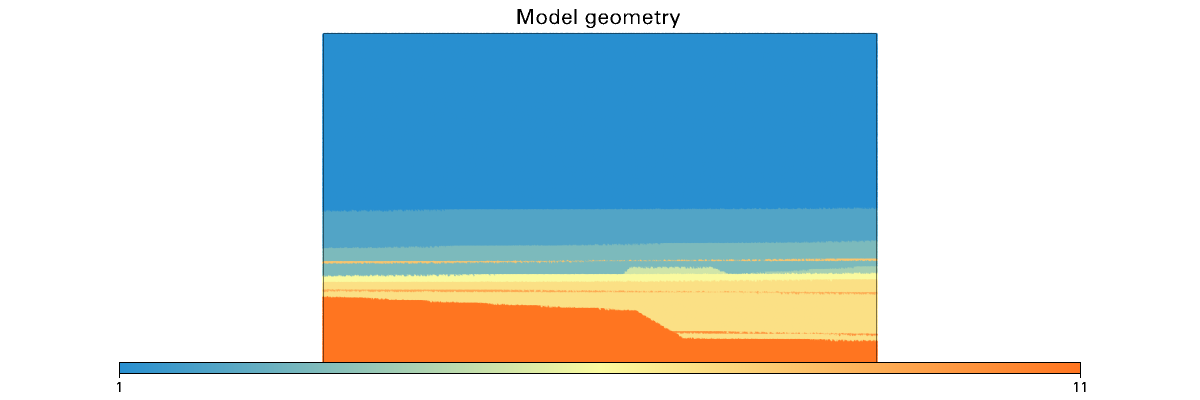

In [6]:
Fig = glucifer.Figure(figsize=(1200,400), title="Model geometry", quality=2)
Fig.Points(Model.swarm, Model.materialField, fn_size=3.)
Fig.show()

In [7]:
# Compressibility should be zero when using Lecode isostasy
#air.diffusivity   = 22e-6 * u.metre**2 / u.second# air.capacity = 100. * u.joule / (u.kelvin * u.kilogram)
air.diffusivity = 1.0e-6 * u.metre**2 / u.second
air.capacity = 1000. * u.joule / (u.kelvin * u.kilogram)


# ## Density

# air.density       = 1. * u.kilogram / u.metre**3
# era.density       = GEO.LinearDensity(2250. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
# orubadi.density   = GEO.LinearDensity(2350. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
# aure.density      = GEO.LinearDensity(2400. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
# purimendi.density = GEO.LinearDensity(2600. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
# mesozoic.density  = GEO.LinearDensity(2700. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
# basement.density  = GEO.LinearDensity(3500. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
# carbonate.density = GEO.LinearDensity(2600. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)

# decollement_orubadi.density    = GEO.LinearDensity(2350. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
# decollement1_mesozoic.density  = GEO.LinearDensity(2700. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
# decollement2_mesozoic.density  = GEO.LinearDensity(2700. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)


## or:

air.density       = 1. * u.kilogram / u.metre**3
era.density       = 2250. * u.kilogram / u.metre**3
orubadi.density   = 2350. * u.kilogram / u.metre**3
aure.density      = 2400. * u.kilogram / u.metre**3 # no data
purimendi.density = 2600. * u.kilogram / u.metre**3 
mesozoic.density  = 2700. * u.kilogram / u.metre**3 
basement.density  = 3500. * u.kilogram / u.metre**3 # no data 2500. to 2900.
carbonate.density = 2650. * u.kilogram / u.metre**3
decollement_orubadi.density    = 2350. * u.kilogram / u.metre**3
decollement1_mesozoic.density  = 2700. * u.kilogram / u.metre**3
decollement2_mesozoic.density  = 2700. * u.kilogram / u.metre**3

 

## Radioganic Heat Production # no data

# era.radiogenicHeatProd       = 1. * u.microwatt / u.meter**3
# orubadi.radiogenicHeatProd   = 1. * u.microwatt / u.meter**3
# aure.radiogenicHeatProd      = 1. * u.microwatt / u.meter**3
# purimendi.radiogenicHeatProd = 1. * u.microwatt / u.meter**3
# mesozoic.radiogenicHeatProd  = 1. * u.microwatt / u.meter**3
# basement.radiogenicHeatProd  = 1. * u.microwatt / u.meter**3

# decollement_orubadi.radiogenicHeatProd   = 1. * u.microwatt / u.meter**3
# decollement1_mesozoic.radiogenicHeatProd = 1. * u.microwatt / u.meter**3
# decollement1_mesozoic.radiogenicHeatProd = 1. * u.microwatt / u.meter**3


## Viscous Rheologies # no data so isoviscous

rh = GEO.ViscousCreepRegistry()



air.viscosity       = 0.00008 * rh.Wet_Quartz_Dislocation_Goetze_et_al_1978
era.viscosity       = 0.00012 * rh.Wet_Quartz_Dislocation_Goetze_et_al_1978
orubadi.viscosity   = 0.00008 * rh.Wet_Quartz_Dislocation_Goetze_et_al_1978
aure.viscosity      = 0.00008 * rh.Wet_Quartz_Dislocation_Goetze_et_al_1978
purimendi.viscosity = 0.8 * rh.Wet_Quartz_Dislocation_Goetze_et_al_1978
mesozoic.viscosity  = 0.4 * rh.Wet_Quartz_Dislocation_Goetze_et_al_1978
basement.viscosity  = rh.Wet_Quartz_Dislocation_Goetze_et_al_1978
# fault.viscosity              = 5e22 * u.pascal * u.second
carbonate.viscosity = purimendi.viscosity



decollement_orubadi.viscosity    = 1e22 * u.pascal * u.second
decollement1_mesozoic.viscosity  = 1e22 * u.pascal * u.second
decollement2_mesozoic.viscosity  = 1e22 * u.pascal * u.second


## Plasticities

pl = GEO.PlasticityRegistry()

# sediment.plasticity #same for uppercrust     = GEO.DruckerPrager(name="Sediment Plasticity",
#                                             cohesion=40. * u.megapascal,
#                                             cohesionAfterSoftening=4.0 * u.megapascal,
#                                             frictionCoefficient=0.268,
#                                             frictionAfterSoftening=0.0268,
#                                             epsilon1=0.0, epsilon2=0.15)
# sediment.stressLimiter  = 1000. * u.megapascal



era.plasticity = GEO.DruckerPrager(name="era_pl",
                                         cohesion=5. * u.megapascal, #20.
                                         cohesionAfterSoftening=0.2 * u.megapascal,
                                         frictionCoefficient=0.84,
                                         frictionAfterSoftening=0.5,
                                         epsilon1=0.1, epsilon2=0.25)

orubadi.plasticity = GEO.DruckerPrager(name="orubadi_pl",
                                        cohesion=5. * u.megapascal,
                                        cohesionAfterSoftening=1. * u.megapascal,
                                        frictionCoefficient=0.18,
                                        frictionAfterSoftening=0.05,
                                        epsilon1=0.1, epsilon2=0.25)

aure.plasticity  = GEO.DruckerPrager(name="aure_pl",
                                        cohesion=5. * u.megapascal,
                                        cohesionAfterSoftening=2. * u.megapascal,
                                        frictionCoefficient=0.84,
                                        frictionAfterSoftening=0.112,
                                        epsilon1=0.1, epsilon2=0.25)

purimendi.plasticity = GEO.DruckerPrager(name="purimendi_pl",
                                        cohesion=10. * u.megapascal,
                                        cohesionAfterSoftening=3. * u.megapascal,
                                        frictionCoefficient=0.577,
                                        frictionAfterSoftening=0.112,
                                        epsilon1=0.1, epsilon2=0.25)

mesozoic.plasticity  = GEO.DruckerPrager(name="mesozoic_pl",
                                         cohesion=10. * u.megapascal,#30
                                         cohesionAfterSoftening=3. * u.megapascal,
                                         frictionCoefficient=0.268,
                                         frictionAfterSoftening=0.112,
                                         epsilon1=0.1, epsilon2=0.25)

basement.plasticity  = GEO.DruckerPrager(name="basement_pl",
                                         cohesion=40. * u.megapascal, #try 20
                                         cohesionAfterSoftening=4. * u.megapascal,
                                         frictionCoefficient=0.2, 
                                         frictionAfterSoftening=0.577,
                                         epsilon1=0.1, epsilon2=0.25)

# fault.plasticity = GEO.DruckerPrager(name="fault_pl",
#                                      cohesion=20. * u.megapascal,
#                                      cohesionAfterSoftening=0.8 * u.megapascal,
#                                      frictionCoefficient=0.577,
#                                      frictionAfterSoftening=0.02308,
#                                      epsilon1=0.0, epsilon2=0.2)

carbonate.plasticity = purimendi.plasticity

decollement_orubadi.plasticity    = era.plasticity
decollement1_mesozoic.plasticity  = mesozoic.plasticity
decollement2_mesozoic.plasticity  = mesozoic.plasticity


era.stressLimiter = 75.0 * u.megapascal
orubadi.stressLimiter   = 75.0 * u.megapascal
aure.stressLimiter      = 75.0 * u.megapascal
purimendi.stressLimiter = 75.0 * u.megapascal
mesozoic.stressLimiter  = 75.0 * u.megapascal
basement.stressLimiter  = 150.0 * u.megapascal
#fault.stressLimiter = 50.0 * u.megapascal

carbonate.stressLimiter = purimendi.stressLimiter

decollement_orubadi.stressLimiter = 75.0 * u.megapascal
decollement1_mesozoic.stressLimiter = 75.0 * u.megapascal
decollement2_mesozoic.stressLimiter = 75.0 * u.megapascal




In [8]:
solidii = GEO.SolidusRegistry()
crust_solidus = solidii.Crustal_Solidus
mantle_solidus = solidii.Mantle_Solidus

liquidii = GEO.LiquidusRegistry()
crust_liquidus = liquidii.Crustal_Liquidus
mantle_liquidus = liquidii.Mantle_Liquidus

basement.add_melt_modifier(crust_solidus, crust_liquidus, 
                         latentHeatFusion=250.0 * u.kilojoules / u.kilogram / u.kelvin,
                         meltFraction=0.,
                         meltFractionLimit=0.3,
                         meltExpansion=0.13, 
                         viscosityChangeX1 = 0.15,
                         viscosityChangeX2 = 0.30,
                         viscosityChange = 1.0e-3
                        )



In [9]:
Model.set_temperatureBCs(top=273. * u.degK, 
                         bottom=320. * u.degK, 
                         materials=[(air, 273. * u.degK), (basement,320. * u.degK)])

Model.set_velocityBCs(left=[0. * u.kilometer / u.year, None],
                      right=[0.5 * u.centimeter / u.year, None],
                      bottom = [None , 0.])




In [10]:
x_c, y_c = GEO.circles_grid(radius=0.2*u.kilometer, 
                     minCoord=[Model.minCoord[0], basement.bottom], 
                     maxCoord=[Model.maxCoord[0], 0.*u.kilometer])

FSE_Crust = Model.add_passive_tracers(name="FSE_Crust", vertices=[x_c, y_c])

In [11]:
Model.init_model()

In [12]:
# Fig = glucifer.Figure(figsize=(1200,400), title="Temperature", quality=2)
# Fig.Points(Model.swarm, GEO.Dimensionalize(Model.temperature, u.degK), fn_size=3.0)
# Fig.show()

In [13]:
# Fig = glucifer.Figure(figsize=(1200,400), title="Pressure (MPa)", quality=2)
# Fig.Surface(Model.mesh, GEO.Dimensionalize(Model.pressureField, u.megapascal), fn_size=2.0)
# Fig.show()

In [14]:
Model.solver.set_inner_method("mumps")
Model.solver.set_penalty(1e6)
#GEO.rcParams["advection.diffusion.method"] = "SLCN"

In [15]:
x = np.linspace(GEO.nd(Model.minCoord[0]), GEO.nd(Model.maxCoord[0]), 4800) 
y = 0. * u.kilometer

surface_tracers = Model.add_passive_tracers(name="Surface", vertices=[x, y])
moho_tracers = Model.add_passive_tracers(name="Moho", vertices=[x,y-5.*u.kilometer])
Lab_tracers = Model.add_passive_tracers(name="Lab", vertices=[x,y-10.*u.kilometer])

#x = 100. * u.kilometer
#y = np.linspace(Model.minCoord[1], Model.maxCoord[1], 1000) * u.kilometer
#vertical_tracers1 = Model.add_passive_tracers(vertices=[x,y])

x1 = 480. * u.kilometer
y1 = -20. * u.kilometer
pt1_tracer = Model.add_passive_tracers(name="Pt1", vertices=[x1, y1])

#P1 = Model.add_passive_tracers(vertices=[x1,y1])

#moho_tracers.add_tracked_field(Model.temperature, name="moho_tracers" , dataType="float", units=u.degK, count=1, overwrite=True)
#moho_tracers.add_tracked_field(Model.temperature, name="Temperature" , dataType="float", units=u.degK, count=1, overwrite=True)
moho_tracers.add_tracked_field(Model.pressureField, name="Pressure" , dataType="float", units=u.megapascal, count=1, overwrite=True)

#surface_tracers.add_tracked_field(Model.temperature, name="Temperature" , dataType="float", units=u.degK, count=1, overwrite=True)
surface_tracers.add_tracked_field(Model.pressureField, name="Pressure" , dataType="float", units=u.megapascal, count=1, overwrite=True)

#pt1_tracer.add_tracked_field(Model.temperature, name="Temperature" , dataType="float", units=u.degK, count=1, overwrite=True)
#pt1_tracer.add_tracked_field(Model.pressureField, name="Pressure" , dataType="float", units=u.megapascal, count=1, overwrite=True)
#pt1_tracers2 = Model.pt1_tracer.add_tracked_field(Model.strainRateField, name="Pt1_StrainRate", dataType="float", units=u.sec, count=1, overwrite=True)
pt1_tracer.add_tracked_field(Model.temperature, name="Pt1_Temp", dataType="float", units=u.degK, count=1, overwrite=True)
pt1_tracer.add_tracked_field(Model.pressureField, name="Pt1_Press", dataType="float", units=u.megapascal, count=1, overwrite=False)
pt1_tracer.add_tracked_field(Model.strainRateField, name="Pt1_StrainRate", dataType="float", units=u.sec, count=1, overwrite=False)
#Moho = moho_tracers.add_variable( dataType="double", count=1 )

In [16]:
Model.swarm._escapedRoutine

<libUnderworld.libUnderworldPy.PICellerator.EscapedRoutine; proxy of <Swig Object of type 'EscapedRoutine *' at 0x7f229592d870> >

In [17]:
# x2 = np.linspace(GEO.nd(Model.minCoord[0]), GEO.nd(Model.maxCoord[0]), 1000) 
# y2 = -10. * u.kilometer
# level_tracers = Model.add_passive_tracers(name="Level", vertices=[x2,y2])
# level_tracers2 = Model.level_tracers.add_tracked_field(Model.strainRateField, name="Lev_StrainRate", dataType="float", units=u.sec, count=1, overwrite=True)

In [18]:
# x_c, y_c = GEO.circles_grid(radius=2.0*u.kilometer, 
#                     minCoord=[Model.minCoord[0], basement.top], 
#                     maxCoord=[Model.maxCoord[0], 0.*u.kilometer])
# circles_c = Model.add_passive_tracers(name="FSE_Crust", vertices=[x_c, y_c])

# x_m, y_m = GEO.circles_grid(radius=2.0*u.kilometer, 
#                     minCoord=[Model.minCoord[0], basement.bottom], 
#                     maxCoord=[Model.maxCoord[0], basement.top])
# circles_m = Model.add_passive_tracers(name="FSE_Mantle", vertices=[x_m, y_m])

# import glucifer
# Fig = glucifer.Figure(figsize=(1200,400), fn_size=4.0)
# Fig.Points(surface_tracers.swarm, pointSize=2.0)
# Fig.Points(moho_tracers.swarm, pointSize=2.0)
# Fig.Points(circles_c.swarm, pointSize=1.5)
# Fig.Points(circles_m.swarm, pointSize=0.1)
# Fig.Points(Model.swarm, Model.materialField, fn_size=2.0)
# Fig.show()





In [19]:
# mohoT = Model.temperature.evaluate(moho_tracers.swarm)[:,0].mean()
# print("Moho Temperature = ", GEO.Dimensionalize(mohoT, u.degC)) 

# LabT = Model.temperature.evaluate(Lab_tracers.swarm)[:,0].mean()
# print("Lab Temperature = ", GEO.Dimensionalize(LabT, u.degC)) 


In [20]:

# MyTemperatureField=(Model.temperature.data[:] * GEO.Dimensionalize(1.0, u.degK)).magnitude 

# TemperatureData=np.asarray(MyTemperatureField)
# #ViscosityDataShaped=ViscosityData.reshape(81,321)
# TemperatureDataShaped=TemperatureData.reshape(resolution[1]+1,resolution[0]+1)

# #Two profiles located at the left walls and the middle.
# plt.plot(TemperatureDataShaped[:,0], np.linspace(Model.bottom,Model.top,resolution[1]+1))
# plt.plot(TemperatureDataShaped[:, resolution[1]/2], np.linspace(Model.bottom,Model.top,resolution[1]+1))

# ## plt.yticks([-700,-300,-150,-40,0,68])
# ## plt.xticks([20, 550.0, 1350])
# plt.grid()
# #plt.xscale('log')
# plt.xlabel('Temperature K')
# plt.ylabel('Depth (km)')
# plt.title('Temperature')
# plt.show()



In [21]:
# MyPressureField=(Model.pressureField.data[:] * GEO.Dimensionalize(1.0, u.megapascal)).magnitude 

# PressureData=np.asarray(MyPressureField)
# #ViscosityDataShaped=ViscosityData.reshape(81,321)
# PressureDataShaped=PressureData.reshape(resolution[1],resolution[0])

# #Two profiles located at the left walls and the middle.
# plt.plot(PressureDataShaped[:,0], np.linspace(Model.bottom,Model.top,resolution[1]))
# plt.plot(PressureDataShaped[:,resolution[1]/2], np.linspace(Model.bottom,Model.top,resolution[1]))

# ## plt.yticks([-700,-300,-150,-40,0,68])
# ## plt.xticks([20, 550.0, 1350])
# plt.grid()
# #plt.xscale('log')
# plt.xlabel('Pressure MPa')
# plt.ylabel('Depth (km)')
# plt.title('Pressure')
# plt.show()




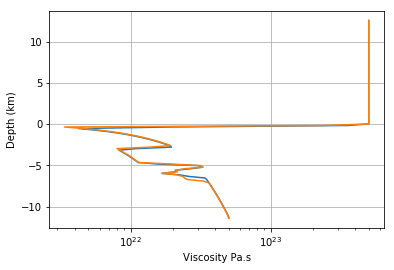

In [22]:
MyViscosityField=(Model.projViscosityField.data[:] * GEO.Dimensionalize(1.0, u.pascal * u.second)).magnitude 

ViscosityData=np.asarray(MyViscosityField)
#ViscosityDataShaped=ViscosityData.reshape(81,321)
ViscosityDataShaped=ViscosityData.reshape(resolution[1]+1,resolution[0]+1)

#Two profiles located at the left walls and the middle.
plt.plot(ViscosityDataShaped[:,0], np.linspace(Model.bottom,Model.top,resolution[1]+1))
plt.plot(ViscosityDataShaped[:,resolution[1]/2], np.linspace(Model.bottom,Model.top,resolution[1]+1))



## plt.yticks([-700,-300,-150,-40,0,68])
## plt.xticks([20, 550.0, 1350])
plt.grid()
plt.xscale('log')
plt.xlabel('Viscosity Pa.s')
plt.ylabel('Depth (km)')
## plt.title('Viscosity')
plt.show()



In [23]:
GEO.rcParams["initial.nonlinear.tolerance"] = 1e-2
GEO.rcParams["nonlinear.tolerance"] = 1e-2
#GEO.rcParams["solver"] = "mumps"
#GEO.rcParams["penalty"] = 0
GEO.rcParams["swarm.particles.per.cell.2D"] = 30
GEO.rcParams

RcParams({'CFL': 0.5,
          'advection.diffusion.method': 'SUPG',
          'averaging.method': 1,
          'default.outputs': [u'temperature',
                              u'pressureField',
                              u'strainRateField',
                              u'velocityField',
                              u'projStressField',
                              u'projTimeField',
                              u'projMaterialField',
                              u'projViscosityField',
                              u'projStressField',
                              u'projMeltField',
                              u'projPlasticStrain',
                              u'projDensityField'],
          'densityField.SIunits': <Unit('kilogram / meter ** 3')>,
          'initial.nonlinear.max.iterations': 500,
          'initial.nonlinear.min.iterations': 2,
          'initial.nonlinear.tolerance': 0.01,
          'nonlinear.max.iterations': 500,
          'nonlinear.min.iterations': 2,
  

In [24]:
# Model.solve()


In [25]:
# MyStressField=(Model.projStressField.data[:] * GEO.Dimensionalize(1.0, u.megapascal)).magnitude 

# StressData=np.asarray(MyStressField)
# #StressDataShaped=StressData.reshape(120,480)
# StressDataShaped=StressData.reshape(resolution[1],resolution[0])

# #Two profiles located at the left walls and the middle.

# plt.plot(StressDataShaped[:,0], np.linspace(Model.bottom,Model.top,resolution[1]))
# plt.plot(StressDataShaped[:,resolution[1]/2], np.linspace(Model.bottom,Model.top,resolution[1]))


# ## plt.yticks([-700,-300,-150,-40,0,68])
# ## plt.xticks([20, 550.0, 1350])
# plt.grid()
# plt.xlabel('Stress MPa')
# plt.ylabel('Depth (km)')
# plt.title('Deviatoric Stress')
# plt.show()

In [26]:
# Fig = glucifer.Figure(figsize=(1200,400), quality=2)
# Fig.VectorArrows(Model.mesh, GEO.Dimensionalize(Model.velocityField, u.millimeter / u.year), fn_size=2.0)
# Fig.show()

In [ ]:
#help(Model.run_for)
# Model.run_for(nstep=1000)
Model.run_for(10.0 * u.megayear, checkpoint_interval=0.01*u.megayear)

Running with UWGeodynamics version 2.7.7
Options:  -remove_constant_pressure_null_space False -ksp_k2_type NULL -change_backsolve False -pc_type none -force_correction True -Q22_pc_type gkgdiag -change_A11rhspresolve False -ksp_type bsscr -rescale_equations False -restore_K False -A11_pc_type lu -A11_pc_factor_mat_solver_package mumps -A11_ksp_type preonly -scr_ksp_type fgmres -scr_ksp_rtol 1e-05 -A11_mg_active False
Step:     1 Model Time: 0.00 megayear dt: 0.00 megayear (2019-09-02 01:12:17)
Step:     2 Model Time: 0.00 megayear dt: 0.00 megayear (2019-09-02 01:12:51)
Step:     3 Model Time: 0.00 megayear dt: 0.00 megayear (2019-09-02 01:13:24)
Step:     4 Model Time: 0.00 megayear dt: 0.00 megayear (2019-09-02 01:13:57)
Step:     5 Model Time: 0.00 megayear dt: 0.00 megayear (2019-09-02 01:14:30)
Step:     6 Model Time: 0.00 megayear dt: 0.00 megayear (2019-09-02 01:15:04)
Step:     7 Model Time: 0.00 megayear dt: 0.00 megayear (2019-09-02 01:15:38)
Step:     8 Model Time: 0.00 mega

Step:   101 Model Time: 0.04 megayear dt: 0.00 megayear (2019-09-02 02:11:22)
Step:   102 Model Time: 0.04 megayear dt: 0.00 megayear (2019-09-02 02:11:55)
Step:   103 Model Time: 0.04 megayear dt: 0.00 megayear (2019-09-02 02:12:29)
Step:   104 Model Time: 0.04 megayear dt: 0.00 megayear (2019-09-02 02:13:46)
Step:   105 Model Time: 0.04 megayear dt: 0.00 megayear (2019-09-02 02:14:20)
Step:   106 Model Time: 0.04 megayear dt: 0.00 megayear (2019-09-02 02:14:55)
Step:   107 Model Time: 0.04 megayear dt: 0.00 megayear (2019-09-02 02:15:29)
Step:   108 Model Time: 0.04 megayear dt: 0.00 megayear (2019-09-02 02:16:02)
Step:   109 Model Time: 0.04 megayear dt: 0.00 megayear (2019-09-02 02:16:36)
Step:   110 Model Time: 0.04 megayear dt: 0.00 megayear (2019-09-02 02:17:11)
Step:   111 Model Time: 0.04 megayear dt: 0.00 megayear (2019-09-02 02:17:45)
Step:   112 Model Time: 0.04 megayear dt: 0.00 megayear (2019-09-02 02:18:19)
Step:   113 Model Time: 0.04 megayear dt: 0.00 megayear (2019-09

Step:   207 Model Time: 0.08 megayear dt: 0.00 megayear (2019-09-02 03:15:54)
Step:   208 Model Time: 0.08 megayear dt: 0.00 megayear (2019-09-02 03:17:12)
Step:   209 Model Time: 0.08 megayear dt: 0.00 megayear (2019-09-02 03:17:48)
Step:   210 Model Time: 0.08 megayear dt: 0.00 megayear (2019-09-02 03:18:24)
Step:   211 Model Time: 0.08 megayear dt: 0.00 megayear (2019-09-02 03:19:00)
Step:   212 Model Time: 0.08 megayear dt: 0.00 megayear (2019-09-02 03:19:35)
Step:   213 Model Time: 0.08 megayear dt: 0.00 megayear (2019-09-02 03:20:11)
Step:   214 Model Time: 0.08 megayear dt: 0.00 megayear (2019-09-02 03:20:46)
Step:   215 Model Time: 0.08 megayear dt: 0.00 megayear (2019-09-02 03:21:21)
Step:   216 Model Time: 0.08 megayear dt: 0.00 megayear (2019-09-02 03:21:56)
Step:   217 Model Time: 0.08 megayear dt: 0.00 megayear (2019-09-02 03:22:31)
Step:   218 Model Time: 0.08 megayear dt: 0.00 megayear (2019-09-02 03:23:07)
Step:   219 Model Time: 0.08 megayear dt: 0.00 megayear (2019-09

Step:   313 Model Time: 0.12 megayear dt: 0.00 megayear (2019-09-02 04:22:46)
Step:   314 Model Time: 0.12 megayear dt: 0.00 megayear (2019-09-02 04:23:22)
Step:   315 Model Time: 0.12 megayear dt: 0.00 megayear (2019-09-02 04:23:59)
Step:   316 Model Time: 0.12 megayear dt: 0.00 megayear (2019-09-02 04:24:35)
Step:   317 Model Time: 0.12 megayear dt: 0.00 megayear (2019-09-02 04:25:12)
Step:   318 Model Time: 0.12 megayear dt: 0.00 megayear (2019-09-02 04:25:49)
Step:   319 Model Time: 0.12 megayear dt: 0.00 megayear (2019-09-02 04:26:25)
Step:   320 Model Time: 0.12 megayear dt: 0.00 megayear (2019-09-02 04:27:01)
Step:   321 Model Time: 0.12 megayear dt: 0.00 megayear (2019-09-02 04:27:37)
Step:   322 Model Time: 0.12 megayear dt: 0.00 megayear (2019-09-02 04:28:13)
Step:   323 Model Time: 0.12 megayear dt: 0.00 megayear (2019-09-02 04:28:50)
Step:   324 Model Time: 0.12 megayear dt: 0.00 megayear (2019-09-02 04:29:27)
Step:   325 Model Time: 0.13 megayear dt: 0.00 megayear (2019-09

Step:   419 Model Time: 0.16 megayear dt: 0.00 megayear (2019-09-02 05:30:31)
Step:   420 Model Time: 0.16 megayear dt: 0.00 megayear (2019-09-02 05:31:08)
Step:   421 Model Time: 0.16 megayear dt: 0.00 megayear (2019-09-02 05:31:44)
Step:   422 Model Time: 0.16 megayear dt: 0.00 megayear (2019-09-02 05:32:19)
Step:   423 Model Time: 0.16 megayear dt: 0.00 megayear (2019-09-02 05:32:55)
Step:   424 Model Time: 0.16 megayear dt: 0.00 megayear (2019-09-02 05:33:31)
Step:   425 Model Time: 0.16 megayear dt: 0.00 megayear (2019-09-02 05:34:07)
Step:   426 Model Time: 0.16 megayear dt: 0.00 megayear (2019-09-02 05:34:43)
Step:   427 Model Time: 0.16 megayear dt: 0.00 megayear (2019-09-02 05:35:19)
Step:   428 Model Time: 0.16 megayear dt: 0.00 megayear (2019-09-02 05:35:54)
Step:   429 Model Time: 0.17 megayear dt: 0.00 megayear (2019-09-02 05:36:30)
Step:   430 Model Time: 0.17 megayear dt: 0.00 megayear (2019-09-02 05:37:06)
Step:   431 Model Time: 0.17 megayear dt: 0.00 megayear (2019-09

Step:   525 Model Time: 0.20 megayear dt: 0.00 megayear (2019-09-02 06:37:15)
Step:   526 Model Time: 0.20 megayear dt: 0.00 megayear (2019-09-02 06:37:51)
Step:   527 Model Time: 0.20 megayear dt: 0.00 megayear (2019-09-02 06:38:27)
Step:   528 Model Time: 0.20 megayear dt: 0.00 megayear (2019-09-02 06:39:03)
Step:   529 Model Time: 0.20 megayear dt: 0.00 megayear (2019-09-02 06:39:39)
Step:   530 Model Time: 0.20 megayear dt: 0.00 megayear (2019-09-02 06:40:15)
Step:   531 Model Time: 0.20 megayear dt: 0.00 megayear (2019-09-02 06:40:51)
Step:   532 Model Time: 0.20 megayear dt: 0.00 megayear (2019-09-02 06:41:28)
Step:   533 Model Time: 0.21 megayear dt: 0.00 megayear (2019-09-02 06:42:04)
Step:   534 Model Time: 0.21 megayear dt: 0.00 megayear (2019-09-02 06:42:40)
Step:   535 Model Time: 0.21 megayear dt: 0.00 megayear (2019-09-02 06:43:16)
Step:   536 Model Time: 0.21 megayear dt: 0.00 megayear (2019-09-02 06:43:52)
Step:   537 Model Time: 0.21 megayear dt: 0.00 megayear (2019-09

Step:   631 Model Time: 0.24 megayear dt: 0.00 megayear (2019-09-02 07:45:26)
Step:   632 Model Time: 0.24 megayear dt: 0.00 megayear (2019-09-02 07:46:03)
Step:   633 Model Time: 0.24 megayear dt: 0.00 megayear (2019-09-02 07:46:41)
Step:   634 Model Time: 0.24 megayear dt: 0.00 megayear (2019-09-02 07:47:18)
Step:   635 Model Time: 0.24 megayear dt: 0.00 megayear (2019-09-02 07:47:56)
Step:   636 Model Time: 0.24 megayear dt: 0.00 megayear (2019-09-02 07:48:34)
Step:   637 Model Time: 0.25 megayear dt: 0.00 megayear (2019-09-02 07:49:12)
Step:   638 Model Time: 0.25 megayear dt: 0.00 megayear (2019-09-02 07:49:50)
Step:   639 Model Time: 0.25 megayear dt: 0.00 megayear (2019-09-02 07:50:29)
Step:   640 Model Time: 0.25 megayear dt: 0.00 megayear (2019-09-02 07:51:07)
Step:   641 Model Time: 0.25 megayear dt: 0.00 megayear (2019-09-02 07:51:45)
Step:   642 Model Time: 0.25 megayear dt: 0.00 megayear (2019-09-02 07:52:23)
Step:   643 Model Time: 0.25 megayear dt: 0.00 megayear (2019-09

Step:   737 Model Time: 0.28 megayear dt: 0.00 megayear (2019-09-02 08:55:22)
Step:   738 Model Time: 0.28 megayear dt: 0.00 megayear (2019-09-02 08:56:01)
Step:   739 Model Time: 0.28 megayear dt: 0.00 megayear (2019-09-02 08:56:39)
Step:   740 Model Time: 0.28 megayear dt: 0.00 megayear (2019-09-02 08:57:17)
Step:   741 Model Time: 0.29 megayear dt: 0.00 megayear (2019-09-02 08:57:55)
Step:   742 Model Time: 0.29 megayear dt: 0.00 megayear (2019-09-02 08:58:33)
Step:   743 Model Time: 0.29 megayear dt: 0.00 megayear (2019-09-02 08:59:10)
Step:   744 Model Time: 0.29 megayear dt: 0.00 megayear (2019-09-02 08:59:48)
Step:   745 Model Time: 0.29 megayear dt: 0.00 megayear (2019-09-02 09:00:25)
Step:   746 Model Time: 0.29 megayear dt: 0.00 megayear (2019-09-02 09:01:02)
Step:   747 Model Time: 0.29 megayear dt: 0.00 megayear (2019-09-02 09:01:39)
Step:   748 Model Time: 0.29 megayear dt: 0.00 megayear (2019-09-02 09:02:17)
Step:   749 Model Time: 0.29 megayear dt: 0.00 megayear (2019-09

Step:   843 Model Time: 0.32 megayear dt: 0.00 megayear (2019-09-02 10:05:08)
Step:   844 Model Time: 0.32 megayear dt: 0.00 megayear (2019-09-02 10:05:46)
Step:   845 Model Time: 0.33 megayear dt: 0.00 megayear (2019-09-02 10:06:24)
Step:   846 Model Time: 0.33 megayear dt: 0.00 megayear (2019-09-02 10:07:02)
Step:   847 Model Time: 0.33 megayear dt: 0.00 megayear (2019-09-02 10:07:40)
Step:   848 Model Time: 0.33 megayear dt: 0.00 megayear (2019-09-02 10:08:17)
Step:   849 Model Time: 0.33 megayear dt: 0.00 megayear (2019-09-02 10:08:55)
Step:   850 Model Time: 0.33 megayear dt: 0.00 megayear (2019-09-02 10:09:32)
Step:   851 Model Time: 0.33 megayear dt: 0.00 megayear (2019-09-02 10:10:09)
Step:   852 Model Time: 0.33 megayear dt: 0.00 megayear (2019-09-02 10:10:46)
Step:   853 Model Time: 0.33 megayear dt: 0.00 megayear (2019-09-02 10:11:24)
Step:   854 Model Time: 0.33 megayear dt: 0.00 megayear (2019-09-02 10:12:02)
Step:   855 Model Time: 0.33 megayear dt: 0.00 megayear (2019-09

Step:   949 Model Time: 0.37 megayear dt: 0.00 megayear (2019-09-02 11:15:01)
Step:   950 Model Time: 0.37 megayear dt: 0.00 megayear (2019-09-02 11:15:38)
Step:   951 Model Time: 0.37 megayear dt: 0.00 megayear (2019-09-02 11:16:16)
Step:   952 Model Time: 0.37 megayear dt: 0.00 megayear (2019-09-02 11:16:54)
Step:   953 Model Time: 0.37 megayear dt: 0.00 megayear (2019-09-02 11:17:31)
Step:   954 Model Time: 0.37 megayear dt: 0.00 megayear (2019-09-02 11:18:09)
Step:   955 Model Time: 0.37 megayear dt: 0.00 megayear (2019-09-02 11:18:47)
Step:   956 Model Time: 0.37 megayear dt: 0.00 megayear (2019-09-02 11:19:25)
Step:   957 Model Time: 0.37 megayear dt: 0.00 megayear (2019-09-02 11:20:04)
Step:   958 Model Time: 0.37 megayear dt: 0.00 megayear (2019-09-02 11:20:42)
Step:   959 Model Time: 0.37 megayear dt: 0.00 megayear (2019-09-02 11:21:19)
Step:   960 Model Time: 0.37 megayear dt: 0.00 megayear (2019-09-02 11:21:57)
Step:   961 Model Time: 0.37 megayear dt: 0.00 megayear (2019-09

Step:  1055 Model Time: 0.41 megayear dt: 0.00 megayear (2019-09-02 12:25:48)
Step:  1056 Model Time: 0.41 megayear dt: 0.00 megayear (2019-09-02 12:26:27)
Step:  1057 Model Time: 0.41 megayear dt: 0.00 megayear (2019-09-02 12:27:05)
Step:  1058 Model Time: 0.41 megayear dt: 0.00 megayear (2019-09-02 12:27:44)
Step:  1059 Model Time: 0.41 megayear dt: 0.00 megayear (2019-09-02 12:28:21)
Step:  1060 Model Time: 0.41 megayear dt: 0.00 megayear (2019-09-02 12:29:00)
Step:  1061 Model Time: 0.41 megayear dt: 0.00 megayear (2019-09-02 12:29:38)
Step:  1062 Model Time: 0.41 megayear dt: 0.00 megayear (2019-09-02 12:30:17)
Step:  1063 Model Time: 0.41 megayear dt: 0.00 megayear (2019-09-02 12:30:56)
Step:  1064 Model Time: 0.41 megayear dt: 0.00 megayear (2019-09-02 12:31:34)
Step:  1065 Model Time: 0.41 megayear dt: 0.00 megayear (2019-09-02 12:32:13)
Step:  1066 Model Time: 0.41 megayear dt: 0.00 megayear (2019-09-02 12:33:40)
Step:  1067 Model Time: 0.41 megayear dt: 0.00 megayear (2019-09

Step:  1161 Model Time: 0.45 megayear dt: 0.00 megayear (2019-09-02 13:34:38)
Step:  1162 Model Time: 0.45 megayear dt: 0.00 megayear (2019-09-02 13:35:15)
Step:  1163 Model Time: 0.45 megayear dt: 0.00 megayear (2019-09-02 13:35:51)
Step:  1164 Model Time: 0.45 megayear dt: 0.00 megayear (2019-09-02 13:36:28)
Step:  1165 Model Time: 0.45 megayear dt: 0.00 megayear (2019-09-02 13:37:05)
Step:  1166 Model Time: 0.45 megayear dt: 0.00 megayear (2019-09-02 13:37:42)
Step:  1167 Model Time: 0.45 megayear dt: 0.00 megayear (2019-09-02 13:38:19)
Step:  1168 Model Time: 0.45 megayear dt: 0.00 megayear (2019-09-02 13:38:57)
Step:  1169 Model Time: 0.45 megayear dt: 0.00 megayear (2019-09-02 13:39:34)
Step:  1170 Model Time: 0.45 megayear dt: 0.00 megayear (2019-09-02 13:40:56)
Step:  1171 Model Time: 0.45 megayear dt: 0.00 megayear (2019-09-02 13:41:33)
Step:  1172 Model Time: 0.45 megayear dt: 0.00 megayear (2019-09-02 13:42:10)
Step:  1173 Model Time: 0.45 megayear dt: 0.00 megayear (2019-09

Step:  1267 Model Time: 0.49 megayear dt: 0.00 megayear (2019-09-02 14:43:05)
Step:  1268 Model Time: 0.49 megayear dt: 0.00 megayear (2019-09-02 14:43:42)
Step:  1269 Model Time: 0.49 megayear dt: 0.00 megayear (2019-09-02 14:44:19)
Step:  1270 Model Time: 0.49 megayear dt: 0.00 megayear (2019-09-02 14:44:55)
Step:  1271 Model Time: 0.49 megayear dt: 0.00 megayear (2019-09-02 14:45:32)
Step:  1272 Model Time: 0.49 megayear dt: 0.00 megayear (2019-09-02 14:46:08)
Step:  1273 Model Time: 0.49 megayear dt: 0.00 megayear (2019-09-02 14:46:45)
Step:  1274 Model Time: 0.49 megayear dt: 0.00 megayear (2019-09-02 14:48:08)
Step:  1275 Model Time: 0.49 megayear dt: 0.00 megayear (2019-09-02 14:48:45)
Step:  1276 Model Time: 0.49 megayear dt: 0.00 megayear (2019-09-02 14:49:23)
Step:  1277 Model Time: 0.49 megayear dt: 0.00 megayear (2019-09-02 14:49:59)
Step:  1278 Model Time: 0.49 megayear dt: 0.00 megayear (2019-09-02 14:50:35)
Step:  1279 Model Time: 0.49 megayear dt: 0.00 megayear (2019-09

Step:  1373 Model Time: 0.53 megayear dt: 0.00 megayear (2019-09-02 15:51:19)
Step:  1374 Model Time: 0.53 megayear dt: 0.00 megayear (2019-09-02 15:51:56)
Step:  1375 Model Time: 0.53 megayear dt: 0.00 megayear (2019-09-02 15:52:35)
Step:  1376 Model Time: 0.53 megayear dt: 0.00 megayear (2019-09-02 15:53:12)
Step:  1377 Model Time: 0.53 megayear dt: 0.00 megayear (2019-09-02 15:53:50)
Step:  1378 Model Time: 0.53 megayear dt: 0.00 megayear (2019-09-02 15:55:14)
Step:  1379 Model Time: 0.53 megayear dt: 0.00 megayear (2019-09-02 15:55:52)
Step:  1380 Model Time: 0.53 megayear dt: 0.00 megayear (2019-09-02 15:56:30)
Step:  1381 Model Time: 0.53 megayear dt: 0.00 megayear (2019-09-02 15:57:08)
Step:  1382 Model Time: 0.53 megayear dt: 0.00 megayear (2019-09-02 15:57:45)
Step:  1383 Model Time: 0.53 megayear dt: 0.00 megayear (2019-09-02 15:58:22)
Step:  1384 Model Time: 0.53 megayear dt: 0.00 megayear (2019-09-02 15:58:59)
Step:  1385 Model Time: 0.53 megayear dt: 0.00 megayear (2019-09

Step:  1479 Model Time: 0.57 megayear dt: 0.00 megayear (2019-09-02 17:00:13)
Step:  1480 Model Time: 0.57 megayear dt: 0.00 megayear (2019-09-02 17:00:51)
Step:  1481 Model Time: 0.57 megayear dt: 0.00 megayear (2019-09-02 17:01:29)
Step:  1482 Model Time: 0.57 megayear dt: 0.00 megayear (2019-09-02 17:02:52)
Step:  1483 Model Time: 0.57 megayear dt: 0.00 megayear (2019-09-02 17:03:30)
Step:  1484 Model Time: 0.57 megayear dt: 0.00 megayear (2019-09-02 17:04:07)
Step:  1485 Model Time: 0.57 megayear dt: 0.00 megayear (2019-09-02 17:04:43)
Step:  1486 Model Time: 0.57 megayear dt: 0.00 megayear (2019-09-02 17:05:20)
Step:  1487 Model Time: 0.57 megayear dt: 0.00 megayear (2019-09-02 17:05:58)
Step:  1488 Model Time: 0.57 megayear dt: 0.00 megayear (2019-09-02 17:06:34)
Step:  1489 Model Time: 0.57 megayear dt: 0.00 megayear (2019-09-02 17:07:11)
Step:  1490 Model Time: 0.57 megayear dt: 0.00 megayear (2019-09-02 17:07:48)
Step:  1491 Model Time: 0.57 megayear dt: 0.00 megayear (2019-09

Step:  1585 Model Time: 0.61 megayear dt: 0.00 megayear (2019-09-02 18:08:58)
Step:  1586 Model Time: 0.61 megayear dt: 0.00 megayear (2019-09-02 18:10:21)
Step:  1587 Model Time: 0.61 megayear dt: 0.00 megayear (2019-09-02 18:10:58)
Step:  1588 Model Time: 0.61 megayear dt: 0.00 megayear (2019-09-02 18:11:34)
Step:  1589 Model Time: 0.61 megayear dt: 0.00 megayear (2019-09-02 18:12:11)
Step:  1590 Model Time: 0.61 megayear dt: 0.00 megayear (2019-09-02 18:12:48)
Step:  1591 Model Time: 0.61 megayear dt: 0.00 megayear (2019-09-02 18:13:24)
Step:  1592 Model Time: 0.61 megayear dt: 0.00 megayear (2019-09-02 18:14:01)
Step:  1593 Model Time: 0.61 megayear dt: 0.00 megayear (2019-09-02 18:14:38)
Step:  1594 Model Time: 0.61 megayear dt: 0.00 megayear (2019-09-02 18:15:15)
Step:  1595 Model Time: 0.61 megayear dt: 0.00 megayear (2019-09-02 18:15:52)
Step:  1596 Model Time: 0.61 megayear dt: 0.00 megayear (2019-09-02 18:16:30)
Step:  1597 Model Time: 0.61 megayear dt: 0.00 megayear (2019-09

Step:  1691 Model Time: 0.65 megayear dt: 0.00 megayear (2019-09-02 19:18:23)
Step:  1692 Model Time: 0.65 megayear dt: 0.00 megayear (2019-09-02 19:19:00)
Step:  1693 Model Time: 0.65 megayear dt: 0.00 megayear (2019-09-02 19:19:38)
Step:  1694 Model Time: 0.65 megayear dt: 0.00 megayear (2019-09-02 19:20:15)
Step:  1695 Model Time: 0.65 megayear dt: 0.00 megayear (2019-09-02 19:20:53)
Step:  1696 Model Time: 0.65 megayear dt: 0.00 megayear (2019-09-02 19:21:29)
Step:  1697 Model Time: 0.65 megayear dt: 0.00 megayear (2019-09-02 19:22:07)
Step:  1698 Model Time: 0.65 megayear dt: 0.00 megayear (2019-09-02 19:22:43)
Step:  1699 Model Time: 0.65 megayear dt: 0.00 megayear (2019-09-02 19:23:21)
Step:  1700 Model Time: 0.65 megayear dt: 0.00 megayear (2019-09-02 19:23:57)
Step:  1701 Model Time: 0.65 megayear dt: 0.00 megayear (2019-09-02 19:24:34)
Step:  1702 Model Time: 0.65 megayear dt: 0.00 megayear (2019-09-02 19:25:10)
Step:  1703 Model Time: 0.66 megayear dt: 0.00 megayear (2019-09

Step:  1797 Model Time: 0.69 megayear dt: 0.00 megayear (2019-09-02 20:27:06)
Step:  1798 Model Time: 0.69 megayear dt: 0.00 megayear (2019-09-02 20:27:43)
Step:  1799 Model Time: 0.69 megayear dt: 0.00 megayear (2019-09-02 20:28:20)
Step:  1800 Model Time: 0.69 megayear dt: 0.00 megayear (2019-09-02 20:28:57)
Step:  1801 Model Time: 0.69 megayear dt: 0.00 megayear (2019-09-02 20:29:34)
Step:  1802 Model Time: 0.69 megayear dt: 0.00 megayear (2019-09-02 20:30:11)
Step:  1803 Model Time: 0.69 megayear dt: 0.00 megayear (2019-09-02 20:30:48)
Step:  1804 Model Time: 0.69 megayear dt: 0.00 megayear (2019-09-02 20:31:25)
Step:  1805 Model Time: 0.69 megayear dt: 0.00 megayear (2019-09-02 20:32:02)
Step:  1806 Model Time: 0.69 megayear dt: 0.00 megayear (2019-09-02 20:32:39)
Step:  1807 Model Time: 0.70 megayear dt: 0.00 megayear (2019-09-02 20:33:16)
Step:  1808 Model Time: 0.70 megayear dt: 0.00 megayear (2019-09-02 20:33:53)
Step:  1809 Model Time: 0.70 megayear dt: 0.00 megayear (2019-09

Step:  1903 Model Time: 0.73 megayear dt: 0.00 megayear (2019-09-02 21:35:44)
Step:  1904 Model Time: 0.73 megayear dt: 0.00 megayear (2019-09-02 21:36:21)
Step:  1905 Model Time: 0.73 megayear dt: 0.00 megayear (2019-09-02 21:36:58)
Step:  1906 Model Time: 0.73 megayear dt: 0.00 megayear (2019-09-02 21:37:35)
Step:  1907 Model Time: 0.73 megayear dt: 0.00 megayear (2019-09-02 21:38:12)
Step:  1908 Model Time: 0.73 megayear dt: 0.00 megayear (2019-09-02 21:38:49)
Step:  1909 Model Time: 0.73 megayear dt: 0.00 megayear (2019-09-02 21:39:26)
Step:  1910 Model Time: 0.73 megayear dt: 0.00 megayear (2019-09-02 21:40:04)
Step:  1911 Model Time: 0.74 megayear dt: 0.00 megayear (2019-09-02 21:40:41)
Step:  1912 Model Time: 0.74 megayear dt: 0.00 megayear (2019-09-02 21:41:18)
Step:  1913 Model Time: 0.74 megayear dt: 0.00 megayear (2019-09-02 21:41:55)
Step:  1914 Model Time: 0.74 megayear dt: 0.00 megayear (2019-09-02 21:42:32)
Step:  1915 Model Time: 0.74 megayear dt: 0.00 megayear (2019-09

Step:  2009 Model Time: 0.77 megayear dt: 0.00 megayear (2019-09-02 22:44:29)
Step:  2010 Model Time: 0.77 megayear dt: 0.00 megayear (2019-09-02 22:45:06)
Step:  2011 Model Time: 0.77 megayear dt: 0.00 megayear (2019-09-02 22:45:43)
Step:  2012 Model Time: 0.77 megayear dt: 0.00 megayear (2019-09-02 22:46:20)
Step:  2013 Model Time: 0.77 megayear dt: 0.00 megayear (2019-09-02 22:46:57)
Step:  2014 Model Time: 0.77 megayear dt: 0.00 megayear (2019-09-02 22:47:34)
Step:  2015 Model Time: 0.78 megayear dt: 0.00 megayear (2019-09-02 22:48:11)
Step:  2016 Model Time: 0.78 megayear dt: 0.00 megayear (2019-09-02 22:48:48)
Step:  2017 Model Time: 0.78 megayear dt: 0.00 megayear (2019-09-02 22:49:25)
Step:  2018 Model Time: 0.78 megayear dt: 0.00 megayear (2019-09-02 22:50:02)
Step:  2019 Model Time: 0.78 megayear dt: 0.00 megayear (2019-09-02 22:50:39)
Step:  2020 Model Time: 0.78 megayear dt: 0.00 megayear (2019-09-02 22:51:17)
Step:  2021 Model Time: 0.78 megayear dt: 0.00 megayear (2019-09

Step:  2115 Model Time: 0.81 megayear dt: 0.00 megayear (2019-09-02 23:54:00)
Step:  2116 Model Time: 0.81 megayear dt: 0.00 megayear (2019-09-02 23:54:39)
Step:  2117 Model Time: 0.81 megayear dt: 0.00 megayear (2019-09-02 23:55:19)
Step:  2118 Model Time: 0.81 megayear dt: 0.00 megayear (2019-09-02 23:55:58)
Step:  2119 Model Time: 0.82 megayear dt: 0.00 megayear (2019-09-02 23:56:37)
Step:  2120 Model Time: 0.82 megayear dt: 0.00 megayear (2019-09-02 23:57:16)
Step:  2121 Model Time: 0.82 megayear dt: 0.00 megayear (2019-09-02 23:57:55)
Step:  2122 Model Time: 0.82 megayear dt: 0.00 megayear (2019-09-02 23:58:34)
Step:  2123 Model Time: 0.82 megayear dt: 0.00 megayear (2019-09-02 23:59:12)
Step:  2124 Model Time: 0.82 megayear dt: 0.00 megayear (2019-09-02 23:59:51)
Step:  2125 Model Time: 0.82 megayear dt: 0.00 megayear (2019-09-03 00:00:29)
Step:  2126 Model Time: 0.82 megayear dt: 0.00 megayear (2019-09-03 00:01:08)
Step:  2127 Model Time: 0.82 megayear dt: 0.00 megayear (2019-09

Step:  2221 Model Time: 0.85 megayear dt: 0.00 megayear (2019-09-03 01:04:42)
Step:  2222 Model Time: 0.85 megayear dt: 0.00 megayear (2019-09-03 01:05:20)
Step:  2223 Model Time: 0.86 megayear dt: 0.00 megayear (2019-09-03 01:05:58)
Step:  2224 Model Time: 0.86 megayear dt: 0.00 megayear (2019-09-03 01:06:36)
Step:  2225 Model Time: 0.86 megayear dt: 0.00 megayear (2019-09-03 01:07:15)
Step:  2226 Model Time: 0.86 megayear dt: 0.00 megayear (2019-09-03 01:07:53)
Step:  2227 Model Time: 0.86 megayear dt: 0.00 megayear (2019-09-03 01:08:31)
Step:  2228 Model Time: 0.86 megayear dt: 0.00 megayear (2019-09-03 01:09:09)
Step:  2229 Model Time: 0.86 megayear dt: 0.00 megayear (2019-09-03 01:09:46)
Step:  2230 Model Time: 0.86 megayear dt: 0.00 megayear (2019-09-03 01:10:24)
Step:  2231 Model Time: 0.86 megayear dt: 0.00 megayear (2019-09-03 01:11:02)
Step:  2232 Model Time: 0.86 megayear dt: 0.00 megayear (2019-09-03 01:11:39)
Step:  2233 Model Time: 0.86 megayear dt: 0.00 megayear (2019-09

Step:  2327 Model Time: 0.90 megayear dt: 0.00 megayear (2019-09-03 02:21:58)
Step:  2328 Model Time: 0.90 megayear dt: 0.00 megayear (2019-09-03 02:22:38)
Step:  2329 Model Time: 0.90 megayear dt: 0.00 megayear (2019-09-03 02:23:17)
Step:  2330 Model Time: 0.90 megayear dt: 0.00 megayear (2019-09-03 02:23:57)
Step:  2331 Model Time: 0.90 megayear dt: 0.00 megayear (2019-09-03 02:24:37)
Step:  2332 Model Time: 0.90 megayear dt: 0.00 megayear (2019-09-03 02:25:18)
Step:  2333 Model Time: 0.90 megayear dt: 0.00 megayear (2019-09-03 02:25:58)
Step:  2334 Model Time: 0.90 megayear dt: 0.00 megayear (2019-09-03 02:26:41)
Step:  2335 Model Time: 0.90 megayear dt: 0.00 megayear (2019-09-03 02:27:43)
Step:  2336 Model Time: 0.90 megayear dt: 0.00 megayear (2019-09-03 02:28:23)
Step:  2337 Model Time: 0.90 megayear dt: 0.00 megayear (2019-09-03 02:29:02)
Step:  2338 Model Time: 0.90 megayear dt: 0.00 megayear (2019-09-03 02:29:42)
Step:  2339 Model Time: 0.90 megayear dt: 0.00 megayear (2019-09

Step:  2433 Model Time: 0.94 megayear dt: 0.00 megayear (2019-09-03 03:38:16)
Step:  2434 Model Time: 0.94 megayear dt: 0.00 megayear (2019-09-03 03:38:55)
Step:  2435 Model Time: 0.94 megayear dt: 0.00 megayear (2019-09-03 03:39:34)
Step:  2436 Model Time: 0.94 megayear dt: 0.00 megayear (2019-09-03 03:40:12)
Step:  2437 Model Time: 0.94 megayear dt: 0.00 megayear (2019-09-03 03:40:52)
Step:  2438 Model Time: 0.94 megayear dt: 0.00 megayear (2019-09-03 03:41:30)
Step:  2439 Model Time: 0.94 megayear dt: 0.00 megayear (2019-09-03 03:42:09)
Step:  2440 Model Time: 0.94 megayear dt: 0.00 megayear (2019-09-03 03:42:48)
Step:  2441 Model Time: 0.94 megayear dt: 0.00 megayear (2019-09-03 03:43:29)
Step:  2442 Model Time: 0.94 megayear dt: 0.00 megayear (2019-09-03 03:44:08)
Step:  2443 Model Time: 0.94 megayear dt: 0.00 megayear (2019-09-03 03:44:48)
Step:  2444 Model Time: 0.94 megayear dt: 0.00 megayear (2019-09-03 03:46:27)
Step:  2445 Model Time: 0.94 megayear dt: 0.00 megayear (2019-09

Step:  2539 Model Time: 0.98 megayear dt: 0.00 megayear (2019-09-03 04:52:14)
Step:  2540 Model Time: 0.98 megayear dt: 0.00 megayear (2019-09-03 04:52:53)
Step:  2541 Model Time: 0.98 megayear dt: 0.00 megayear (2019-09-03 04:53:33)
Step:  2542 Model Time: 0.98 megayear dt: 0.00 megayear (2019-09-03 04:54:13)
Step:  2543 Model Time: 0.98 megayear dt: 0.00 megayear (2019-09-03 04:54:53)
Step:  2544 Model Time: 0.98 megayear dt: 0.00 megayear (2019-09-03 04:55:33)
Step:  2545 Model Time: 0.98 megayear dt: 0.00 megayear (2019-09-03 04:56:12)
Step:  2546 Model Time: 0.98 megayear dt: 0.00 megayear (2019-09-03 04:56:51)
Step:  2547 Model Time: 0.98 megayear dt: 0.00 megayear (2019-09-03 04:57:30)
Step:  2548 Model Time: 0.98 megayear dt: 0.00 megayear (2019-09-03 04:58:58)
Step:  2549 Model Time: 0.98 megayear dt: 0.00 megayear (2019-09-03 04:59:37)
Step:  2550 Model Time: 0.98 megayear dt: 0.00 megayear (2019-09-03 05:00:17)
Step:  2551 Model Time: 0.98 megayear dt: 0.00 megayear (2019-09

Step:  2645 Model Time: 1.02 megayear dt: 0.00 megayear (2019-09-03 06:05:58)
Step:  2646 Model Time: 1.02 megayear dt: 0.00 megayear (2019-09-03 06:06:37)
Step:  2647 Model Time: 1.02 megayear dt: 0.00 megayear (2019-09-03 06:07:15)
Step:  2648 Model Time: 1.02 megayear dt: 0.00 megayear (2019-09-03 06:07:54)
Step:  2649 Model Time: 1.02 megayear dt: 0.00 megayear (2019-09-03 06:08:34)
Step:  2650 Model Time: 1.02 megayear dt: 0.00 megayear (2019-09-03 06:09:14)
Step:  2651 Model Time: 1.02 megayear dt: 0.00 megayear (2019-09-03 06:09:53)
Step:  2652 Model Time: 1.02 megayear dt: 0.00 megayear (2019-09-03 06:11:21)
Step:  2653 Model Time: 1.02 megayear dt: 0.00 megayear (2019-09-03 06:12:00)
Step:  2654 Model Time: 1.02 megayear dt: 0.00 megayear (2019-09-03 06:12:41)
Step:  2655 Model Time: 1.02 megayear dt: 0.00 megayear (2019-09-03 06:13:20)
Step:  2656 Model Time: 1.02 megayear dt: 0.00 megayear (2019-09-03 06:14:00)
Step:  2657 Model Time: 1.02 megayear dt: 0.00 megayear (2019-09

Step:  2751 Model Time: 1.06 megayear dt: 0.00 megayear (2019-09-03 07:19:15)
Step:  2752 Model Time: 1.06 megayear dt: 0.00 megayear (2019-09-03 07:19:55)
Step:  2753 Model Time: 1.06 megayear dt: 0.00 megayear (2019-09-03 07:20:35)
Step:  2754 Model Time: 1.06 megayear dt: 0.00 megayear (2019-09-03 07:21:14)
Step:  2755 Model Time: 1.06 megayear dt: 0.00 megayear (2019-09-03 07:21:53)
Step:  2756 Model Time: 1.06 megayear dt: 0.00 megayear (2019-09-03 07:23:19)
Step:  2757 Model Time: 1.06 megayear dt: 0.00 megayear (2019-09-03 07:23:58)
Step:  2758 Model Time: 1.06 megayear dt: 0.00 megayear (2019-09-03 07:24:37)
Step:  2759 Model Time: 1.06 megayear dt: 0.00 megayear (2019-09-03 07:25:15)
Step:  2760 Model Time: 1.06 megayear dt: 0.00 megayear (2019-09-03 07:25:54)
Step:  2761 Model Time: 1.06 megayear dt: 0.00 megayear (2019-09-03 07:26:33)
Step:  2762 Model Time: 1.06 megayear dt: 0.00 megayear (2019-09-03 07:27:12)
Step:  2763 Model Time: 1.06 megayear dt: 0.00 megayear (2019-09

Step:  2857 Model Time: 1.10 megayear dt: 0.00 megayear (2019-09-03 08:31:33)
Step:  2858 Model Time: 1.10 megayear dt: 0.00 megayear (2019-09-03 08:32:12)
Step:  2859 Model Time: 1.10 megayear dt: 0.00 megayear (2019-09-03 08:32:51)
Step:  2860 Model Time: 1.10 megayear dt: 0.00 megayear (2019-09-03 08:34:19)
Step:  2861 Model Time: 1.10 megayear dt: 0.00 megayear (2019-09-03 08:34:58)
Step:  2862 Model Time: 1.10 megayear dt: 0.00 megayear (2019-09-03 08:35:37)
Step:  2863 Model Time: 1.10 megayear dt: 0.00 megayear (2019-09-03 08:36:16)
Step:  2864 Model Time: 1.10 megayear dt: 0.00 megayear (2019-09-03 08:36:54)
Step:  2865 Model Time: 1.10 megayear dt: 0.00 megayear (2019-09-03 08:37:34)
Step:  2866 Model Time: 1.10 megayear dt: 0.00 megayear (2019-09-03 08:38:12)
Step:  2867 Model Time: 1.10 megayear dt: 0.00 megayear (2019-09-03 08:38:51)
Step:  2868 Model Time: 1.10 megayear dt: 0.00 megayear (2019-09-03 08:39:31)
Step:  2869 Model Time: 1.10 megayear dt: 0.00 megayear (2019-09

Step:  2963 Model Time: 1.14 megayear dt: 0.00 megayear (2019-09-03 09:43:59)
Step:  2964 Model Time: 1.14 megayear dt: 0.00 megayear (2019-09-03 09:45:26)
Step:  2965 Model Time: 1.14 megayear dt: 0.00 megayear (2019-09-03 09:46:05)
Step:  2966 Model Time: 1.14 megayear dt: 0.00 megayear (2019-09-03 09:46:46)
Step:  2967 Model Time: 1.14 megayear dt: 0.00 megayear (2019-09-03 09:47:25)
Step:  2968 Model Time: 1.14 megayear dt: 0.00 megayear (2019-09-03 09:48:03)
Step:  2969 Model Time: 1.14 megayear dt: 0.00 megayear (2019-09-03 09:48:43)
Step:  2970 Model Time: 1.14 megayear dt: 0.00 megayear (2019-09-03 09:49:22)
Step:  2971 Model Time: 1.14 megayear dt: 0.00 megayear (2019-09-03 09:50:01)
Step:  2972 Model Time: 1.14 megayear dt: 0.00 megayear (2019-09-03 09:50:40)
Step:  2973 Model Time: 1.14 megayear dt: 0.00 megayear (2019-09-03 09:51:19)
Step:  2974 Model Time: 1.14 megayear dt: 0.00 megayear (2019-09-03 09:51:58)
Step:  2975 Model Time: 1.14 megayear dt: 0.00 megayear (2019-09

Step:  3069 Model Time: 1.18 megayear dt: 0.00 megayear (2019-09-03 10:57:18)
Step:  3070 Model Time: 1.18 megayear dt: 0.00 megayear (2019-09-03 10:57:58)
Step:  3071 Model Time: 1.18 megayear dt: 0.00 megayear (2019-09-03 10:58:38)
Step:  3072 Model Time: 1.18 megayear dt: 0.00 megayear (2019-09-03 10:59:17)
Step:  3073 Model Time: 1.18 megayear dt: 0.00 megayear (2019-09-03 10:59:57)
Step:  3074 Model Time: 1.18 megayear dt: 0.00 megayear (2019-09-03 11:00:36)
Step:  3075 Model Time: 1.18 megayear dt: 0.00 megayear (2019-09-03 11:01:15)
Step:  3076 Model Time: 1.18 megayear dt: 0.00 megayear (2019-09-03 11:01:55)
Step:  3077 Model Time: 1.18 megayear dt: 0.00 megayear (2019-09-03 11:02:34)
Step:  3078 Model Time: 1.18 megayear dt: 0.00 megayear (2019-09-03 11:03:13)
Step:  3079 Model Time: 1.18 megayear dt: 0.00 megayear (2019-09-03 11:03:52)
Step:  3080 Model Time: 1.18 megayear dt: 0.00 megayear (2019-09-03 11:04:31)
Step:  3081 Model Time: 1.19 megayear dt: 0.00 megayear (2019-09

Step:  3175 Model Time: 1.22 megayear dt: 0.00 megayear (2019-09-03 12:09:49)
Step:  3176 Model Time: 1.22 megayear dt: 0.00 megayear (2019-09-03 12:10:28)
Step:  3177 Model Time: 1.22 megayear dt: 0.00 megayear (2019-09-03 12:11:07)
Step:  3178 Model Time: 1.22 megayear dt: 0.00 megayear (2019-09-03 12:11:46)
Step:  3179 Model Time: 1.22 megayear dt: 0.00 megayear (2019-09-03 12:12:25)
Step:  3180 Model Time: 1.22 megayear dt: 0.00 megayear (2019-09-03 12:13:04)
Step:  3181 Model Time: 1.22 megayear dt: 0.00 megayear (2019-09-03 12:13:44)
Step:  3182 Model Time: 1.22 megayear dt: 0.00 megayear (2019-09-03 12:14:23)
Step:  3183 Model Time: 1.22 megayear dt: 0.00 megayear (2019-09-03 12:15:02)
Step:  3184 Model Time: 1.22 megayear dt: 0.00 megayear (2019-09-03 12:15:40)
Step:  3185 Model Time: 1.23 megayear dt: 0.00 megayear (2019-09-03 12:16:20)
Step:  3186 Model Time: 1.23 megayear dt: 0.00 megayear (2019-09-03 12:16:58)
Step:  3187 Model Time: 1.23 megayear dt: 0.00 megayear (2019-09

Step:  3281 Model Time: 1.26 megayear dt: 0.00 megayear (2019-09-03 13:22:23)
Step:  3282 Model Time: 1.26 megayear dt: 0.00 megayear (2019-09-03 13:23:02)
Step:  3283 Model Time: 1.26 megayear dt: 0.00 megayear (2019-09-03 13:23:41)
Step:  3284 Model Time: 1.26 megayear dt: 0.00 megayear (2019-09-03 13:24:20)
Step:  3285 Model Time: 1.26 megayear dt: 0.00 megayear (2019-09-03 13:24:59)
Step:  3286 Model Time: 1.26 megayear dt: 0.00 megayear (2019-09-03 13:25:38)
Step:  3287 Model Time: 1.26 megayear dt: 0.00 megayear (2019-09-03 13:26:17)
Step:  3288 Model Time: 1.26 megayear dt: 0.00 megayear (2019-09-03 13:26:56)
Step:  3289 Model Time: 1.27 megayear dt: 0.00 megayear (2019-09-03 13:27:35)
Step:  3290 Model Time: 1.27 megayear dt: 0.00 megayear (2019-09-03 13:28:14)
Step:  3291 Model Time: 1.27 megayear dt: 0.00 megayear (2019-09-03 13:28:53)
Step:  3292 Model Time: 1.27 megayear dt: 0.00 megayear (2019-09-03 13:29:32)
Step:  3293 Model Time: 1.27 megayear dt: 0.00 megayear (2019-09

Step:  3387 Model Time: 1.30 megayear dt: 0.00 megayear (2019-09-03 14:35:21)
Step:  3388 Model Time: 1.30 megayear dt: 0.00 megayear (2019-09-03 14:36:00)
Step:  3389 Model Time: 1.30 megayear dt: 0.00 megayear (2019-09-03 14:36:39)
Step:  3390 Model Time: 1.30 megayear dt: 0.00 megayear (2019-09-03 14:37:18)
Step:  3391 Model Time: 1.30 megayear dt: 0.00 megayear (2019-09-03 14:37:57)
Step:  3392 Model Time: 1.30 megayear dt: 0.00 megayear (2019-09-03 14:38:36)
Step:  3393 Model Time: 1.31 megayear dt: 0.00 megayear (2019-09-03 14:39:15)
Step:  3394 Model Time: 1.31 megayear dt: 0.00 megayear (2019-09-03 14:39:54)
Step:  3395 Model Time: 1.31 megayear dt: 0.00 megayear (2019-09-03 14:40:33)
Step:  3396 Model Time: 1.31 megayear dt: 0.00 megayear (2019-09-03 14:41:13)
Step:  3397 Model Time: 1.31 megayear dt: 0.00 megayear (2019-09-03 14:41:54)
Step:  3398 Model Time: 1.31 megayear dt: 0.00 megayear (2019-09-03 14:42:32)
Step:  3399 Model Time: 1.31 megayear dt: 0.00 megayear (2019-09

Step:  3493 Model Time: 1.34 megayear dt: 0.00 megayear (2019-09-03 15:48:29)
Step:  3494 Model Time: 1.34 megayear dt: 0.00 megayear (2019-09-03 15:49:09)
Step:  3495 Model Time: 1.34 megayear dt: 0.00 megayear (2019-09-03 15:49:49)
Step:  3496 Model Time: 1.34 megayear dt: 0.00 megayear (2019-09-03 15:50:28)
Step:  3497 Model Time: 1.35 megayear dt: 0.00 megayear (2019-09-03 15:51:08)
Step:  3498 Model Time: 1.35 megayear dt: 0.00 megayear (2019-09-03 15:51:48)
Step:  3499 Model Time: 1.35 megayear dt: 0.00 megayear (2019-09-03 15:52:28)
Step:  3500 Model Time: 1.35 megayear dt: 0.00 megayear (2019-09-03 15:53:14)
Step:  3501 Model Time: 1.35 megayear dt: 0.00 megayear (2019-09-03 15:53:54)
Step:  3502 Model Time: 1.35 megayear dt: 0.00 megayear (2019-09-03 15:54:34)
Step:  3503 Model Time: 1.35 megayear dt: 0.00 megayear (2019-09-03 15:55:14)
Step:  3504 Model Time: 1.35 megayear dt: 0.00 megayear (2019-09-03 15:55:54)
Step:  3505 Model Time: 1.35 megayear dt: 0.00 megayear (2019-09

Step:  3599 Model Time: 1.38 megayear dt: 0.00 megayear (2019-09-03 17:02:07)
Step:  3600 Model Time: 1.38 megayear dt: 0.00 megayear (2019-09-03 17:02:46)
Step:  3601 Model Time: 1.39 megayear dt: 0.00 megayear (2019-09-03 17:03:27)
Step:  3602 Model Time: 1.39 megayear dt: 0.00 megayear (2019-09-03 17:04:07)
Step:  3603 Model Time: 1.39 megayear dt: 0.00 megayear (2019-09-03 17:04:46)
Step:  3604 Model Time: 1.39 megayear dt: 0.00 megayear (2019-09-03 17:05:26)
Step:  3605 Model Time: 1.39 megayear dt: 0.00 megayear (2019-09-03 17:06:05)
Step:  3606 Model Time: 1.39 megayear dt: 0.00 megayear (2019-09-03 17:06:45)
Step:  3607 Model Time: 1.39 megayear dt: 0.00 megayear (2019-09-03 17:07:24)
Step:  3608 Model Time: 1.39 megayear dt: 0.00 megayear (2019-09-03 17:08:03)
Step:  3609 Model Time: 1.39 megayear dt: 0.00 megayear (2019-09-03 17:08:43)
Step:  3610 Model Time: 1.39 megayear dt: 0.00 megayear (2019-09-03 17:09:23)
Step:  3611 Model Time: 1.39 megayear dt: 0.00 megayear (2019-09

Step:  3705 Model Time: 1.43 megayear dt: 0.00 megayear (2019-09-03 18:15:44)
Step:  3706 Model Time: 1.43 megayear dt: 0.00 megayear (2019-09-03 18:16:23)
Step:  3707 Model Time: 1.43 megayear dt: 0.00 megayear (2019-09-03 18:17:03)
Step:  3708 Model Time: 1.43 megayear dt: 0.00 megayear (2019-09-03 18:17:43)
Step:  3709 Model Time: 1.43 megayear dt: 0.00 megayear (2019-09-03 18:18:24)
Step:  3710 Model Time: 1.43 megayear dt: 0.00 megayear (2019-09-03 18:19:04)
Step:  3711 Model Time: 1.43 megayear dt: 0.00 megayear (2019-09-03 18:19:44)
Step:  3712 Model Time: 1.43 megayear dt: 0.00 megayear (2019-09-03 18:20:24)
Step:  3713 Model Time: 1.43 megayear dt: 0.00 megayear (2019-09-03 18:21:04)
Step:  3714 Model Time: 1.43 megayear dt: 0.00 megayear (2019-09-03 18:21:43)
Step:  3715 Model Time: 1.43 megayear dt: 0.00 megayear (2019-09-03 18:22:23)
Step:  3716 Model Time: 1.43 megayear dt: 0.00 megayear (2019-09-03 18:23:03)
Step:  3717 Model Time: 1.43 megayear dt: 0.00 megayear (2019-09

Step:  3811 Model Time: 1.47 megayear dt: 0.00 megayear (2019-09-03 19:29:25)
Step:  3812 Model Time: 1.47 megayear dt: 0.00 megayear (2019-09-03 19:30:05)
Step:  3813 Model Time: 1.47 megayear dt: 0.00 megayear (2019-09-03 19:30:44)
Step:  3814 Model Time: 1.47 megayear dt: 0.00 megayear (2019-09-03 19:31:24)
Step:  3815 Model Time: 1.47 megayear dt: 0.00 megayear (2019-09-03 19:32:03)
Step:  3816 Model Time: 1.47 megayear dt: 0.00 megayear (2019-09-03 19:32:43)
Step:  3817 Model Time: 1.47 megayear dt: 0.00 megayear (2019-09-03 19:33:22)
Step:  3818 Model Time: 1.47 megayear dt: 0.00 megayear (2019-09-03 19:34:01)
Step:  3819 Model Time: 1.47 megayear dt: 0.00 megayear (2019-09-03 19:34:40)
Step:  3820 Model Time: 1.47 megayear dt: 0.00 megayear (2019-09-03 19:35:19)
Step:  3821 Model Time: 1.47 megayear dt: 0.00 megayear (2019-09-03 19:35:59)
Step:  3822 Model Time: 1.47 megayear dt: 0.00 megayear (2019-09-03 19:37:27)
Step:  3823 Model Time: 1.47 megayear dt: 0.00 megayear (2019-09

Step:  3917 Model Time: 1.51 megayear dt: 0.00 megayear (2019-09-03 20:43:23)
Step:  3918 Model Time: 1.51 megayear dt: 0.00 megayear (2019-09-03 20:44:03)
Step:  3919 Model Time: 1.51 megayear dt: 0.00 megayear (2019-09-03 20:44:42)
Step:  3920 Model Time: 1.51 megayear dt: 0.00 megayear (2019-09-03 20:45:22)
Step:  3921 Model Time: 1.51 megayear dt: 0.00 megayear (2019-09-03 20:46:02)
Step:  3922 Model Time: 1.51 megayear dt: 0.00 megayear (2019-09-03 20:46:42)
Step:  3923 Model Time: 1.51 megayear dt: 0.00 megayear (2019-09-03 20:47:21)
Step:  3924 Model Time: 1.51 megayear dt: 0.00 megayear (2019-09-03 20:48:02)
Step:  3925 Model Time: 1.51 megayear dt: 0.00 megayear (2019-09-03 20:48:43)
Step:  3926 Model Time: 1.51 megayear dt: 0.00 megayear (2019-09-03 20:50:13)
Step:  3927 Model Time: 1.51 megayear dt: 0.00 megayear (2019-09-03 20:50:53)
Step:  3928 Model Time: 1.51 megayear dt: 0.00 megayear (2019-09-03 20:51:33)
Step:  3929 Model Time: 1.51 megayear dt: 0.00 megayear (2019-09

Step:  4023 Model Time: 1.55 megayear dt: 0.00 megayear (2019-09-03 21:57:33)
Step:  4024 Model Time: 1.55 megayear dt: 0.00 megayear (2019-09-03 21:58:14)
Step:  4025 Model Time: 1.55 megayear dt: 0.00 megayear (2019-09-03 21:58:55)
Step:  4026 Model Time: 1.55 megayear dt: 0.00 megayear (2019-09-03 21:59:36)
Step:  4027 Model Time: 1.55 megayear dt: 0.00 megayear (2019-09-03 22:00:16)
Step:  4028 Model Time: 1.55 megayear dt: 0.00 megayear (2019-09-03 22:00:56)
Step:  4029 Model Time: 1.55 megayear dt: 0.00 megayear (2019-09-03 22:01:36)
Step:  4030 Model Time: 1.55 megayear dt: 0.00 megayear (2019-09-03 22:03:06)
Step:  4031 Model Time: 1.55 megayear dt: 0.00 megayear (2019-09-03 22:03:46)
Step:  4032 Model Time: 1.55 megayear dt: 0.00 megayear (2019-09-03 22:04:27)
Step:  4033 Model Time: 1.55 megayear dt: 0.00 megayear (2019-09-03 22:05:06)
Step:  4034 Model Time: 1.55 megayear dt: 0.00 megayear (2019-09-03 22:05:46)
Step:  4035 Model Time: 1.55 megayear dt: 0.00 megayear (2019-09

Step:  4129 Model Time: 1.59 megayear dt: 0.00 megayear (2019-09-03 23:11:48)
Step:  4130 Model Time: 1.59 megayear dt: 0.00 megayear (2019-09-03 23:12:28)
Step:  4131 Model Time: 1.59 megayear dt: 0.00 megayear (2019-09-03 23:13:08)
Step:  4132 Model Time: 1.59 megayear dt: 0.00 megayear (2019-09-03 23:13:48)
Step:  4133 Model Time: 1.59 megayear dt: 0.00 megayear (2019-09-03 23:14:29)
Step:  4134 Model Time: 1.59 megayear dt: 0.00 megayear (2019-09-03 23:15:58)
Step:  4135 Model Time: 1.59 megayear dt: 0.00 megayear (2019-09-03 23:16:38)
Step:  4136 Model Time: 1.59 megayear dt: 0.00 megayear (2019-09-03 23:17:18)
Step:  4137 Model Time: 1.59 megayear dt: 0.00 megayear (2019-09-03 23:17:58)
Step:  4138 Model Time: 1.59 megayear dt: 0.00 megayear (2019-09-03 23:18:38)
Step:  4139 Model Time: 1.59 megayear dt: 0.00 megayear (2019-09-03 23:19:18)
Step:  4140 Model Time: 1.59 megayear dt: 0.00 megayear (2019-09-03 23:19:58)
Step:  4141 Model Time: 1.59 megayear dt: 0.00 megayear (2019-09

Step:  4235 Model Time: 1.63 megayear dt: 0.00 megayear (2019-09-04 00:27:06)
Step:  4236 Model Time: 1.63 megayear dt: 0.00 megayear (2019-09-04 00:27:46)
Step:  4237 Model Time: 1.63 megayear dt: 0.00 megayear (2019-09-04 00:28:26)
Step:  4238 Model Time: 1.63 megayear dt: 0.00 megayear (2019-09-04 00:29:55)
Step:  4239 Model Time: 1.63 megayear dt: 0.00 megayear (2019-09-04 00:30:35)
Step:  4240 Model Time: 1.63 megayear dt: 0.00 megayear (2019-09-04 00:31:16)
Step:  4241 Model Time: 1.63 megayear dt: 0.00 megayear (2019-09-04 00:31:58)
Step:  4242 Model Time: 1.63 megayear dt: 0.00 megayear (2019-09-04 00:32:38)
Step:  4243 Model Time: 1.63 megayear dt: 0.00 megayear (2019-09-04 00:33:18)
Step:  4244 Model Time: 1.63 megayear dt: 0.00 megayear (2019-09-04 00:33:58)
Step:  4245 Model Time: 1.63 megayear dt: 0.00 megayear (2019-09-04 00:34:37)
Step:  4246 Model Time: 1.63 megayear dt: 0.00 megayear (2019-09-04 00:35:17)
Step:  4247 Model Time: 1.63 megayear dt: 0.00 megayear (2019-09

Step:  4341 Model Time: 1.67 megayear dt: 0.00 megayear (2019-09-04 01:42:37)
Step:  4342 Model Time: 1.67 megayear dt: 0.00 megayear (2019-09-04 01:44:10)
Step:  4343 Model Time: 1.67 megayear dt: 0.00 megayear (2019-09-04 01:44:55)
Step:  4344 Model Time: 1.67 megayear dt: 0.00 megayear (2019-09-04 01:45:36)
Step:  4345 Model Time: 1.67 megayear dt: 0.00 megayear (2019-09-04 01:46:16)
Step:  4346 Model Time: 1.67 megayear dt: 0.00 megayear (2019-09-04 01:46:57)
Step:  4347 Model Time: 1.67 megayear dt: 0.00 megayear (2019-09-04 01:47:39)
Step:  4348 Model Time: 1.67 megayear dt: 0.00 megayear (2019-09-04 01:48:19)
Step:  4349 Model Time: 1.67 megayear dt: 0.00 megayear (2019-09-04 01:49:00)
Step:  4350 Model Time: 1.67 megayear dt: 0.00 megayear (2019-09-04 01:49:40)
Step:  4351 Model Time: 1.67 megayear dt: 0.00 megayear (2019-09-04 01:50:20)
Step:  4352 Model Time: 1.67 megayear dt: 0.00 megayear (2019-09-04 01:51:01)
Step:  4353 Model Time: 1.67 megayear dt: 0.00 megayear (2019-09

Step:  4447 Model Time: 1.71 megayear dt: 0.00 megayear (2019-09-04 02:59:04)
Step:  4448 Model Time: 1.71 megayear dt: 0.00 megayear (2019-09-04 02:59:45)
Step:  4449 Model Time: 1.71 megayear dt: 0.00 megayear (2019-09-04 03:00:27)
Step:  4450 Model Time: 1.71 megayear dt: 0.00 megayear (2019-09-04 03:01:08)
Step:  4451 Model Time: 1.71 megayear dt: 0.00 megayear (2019-09-04 03:01:49)
Step:  4452 Model Time: 1.71 megayear dt: 0.00 megayear (2019-09-04 03:02:30)
Step:  4453 Model Time: 1.71 megayear dt: 0.00 megayear (2019-09-04 03:03:11)
Step:  4454 Model Time: 1.71 megayear dt: 0.00 megayear (2019-09-04 03:03:52)
Step:  4455 Model Time: 1.71 megayear dt: 0.00 megayear (2019-09-04 03:04:33)
Step:  4456 Model Time: 1.71 megayear dt: 0.00 megayear (2019-09-04 03:05:13)
Step:  4457 Model Time: 1.71 megayear dt: 0.00 megayear (2019-09-04 03:05:55)
Step:  4458 Model Time: 1.71 megayear dt: 0.00 megayear (2019-09-04 03:06:37)
Step:  4459 Model Time: 1.72 megayear dt: 0.00 megayear (2019-09

Step:  4553 Model Time: 1.75 megayear dt: 0.00 megayear (2019-09-04 04:14:25)
Step:  4554 Model Time: 1.75 megayear dt: 0.00 megayear (2019-09-04 04:15:06)
Step:  4555 Model Time: 1.75 megayear dt: 0.00 megayear (2019-09-04 04:15:47)
Step:  4556 Model Time: 1.75 megayear dt: 0.00 megayear (2019-09-04 04:16:28)
Step:  4557 Model Time: 1.75 megayear dt: 0.00 megayear (2019-09-04 04:17:09)
Step:  4558 Model Time: 1.75 megayear dt: 0.00 megayear (2019-09-04 04:17:51)
Step:  4559 Model Time: 1.75 megayear dt: 0.00 megayear (2019-09-04 04:18:32)
Step:  4560 Model Time: 1.75 megayear dt: 0.00 megayear (2019-09-04 04:19:13)
Step:  4561 Model Time: 1.75 megayear dt: 0.00 megayear (2019-09-04 04:19:53)
Step:  4562 Model Time: 1.75 megayear dt: 0.00 megayear (2019-09-04 04:20:35)
Step:  4563 Model Time: 1.76 megayear dt: 0.00 megayear (2019-09-04 04:21:17)
Step:  4564 Model Time: 1.76 megayear dt: 0.00 megayear (2019-09-04 04:21:59)
Step:  4565 Model Time: 1.76 megayear dt: 0.00 megayear (2019-09

Step:  4659 Model Time: 1.79 megayear dt: 0.00 megayear (2019-09-04 05:30:40)
Step:  4660 Model Time: 1.79 megayear dt: 0.00 megayear (2019-09-04 05:31:21)
Step:  4661 Model Time: 1.79 megayear dt: 0.00 megayear (2019-09-04 05:32:02)
Step:  4662 Model Time: 1.79 megayear dt: 0.00 megayear (2019-09-04 05:32:43)
Step:  4663 Model Time: 1.79 megayear dt: 0.00 megayear (2019-09-04 05:33:24)
Step:  4664 Model Time: 1.79 megayear dt: 0.00 megayear (2019-09-04 05:34:06)
Step:  4665 Model Time: 1.79 megayear dt: 0.00 megayear (2019-09-04 05:34:46)
Step:  4666 Model Time: 1.79 megayear dt: 0.00 megayear (2019-09-04 05:35:27)
Step:  4667 Model Time: 1.80 megayear dt: 0.00 megayear (2019-09-04 05:36:08)
Step:  4668 Model Time: 1.80 megayear dt: 0.00 megayear (2019-09-04 05:36:49)
Step:  4669 Model Time: 1.80 megayear dt: 0.00 megayear (2019-09-04 05:37:31)
Step:  4670 Model Time: 1.80 megayear dt: 0.00 megayear (2019-09-04 05:38:13)
Step:  4671 Model Time: 1.80 megayear dt: 0.00 megayear (2019-09

Step:  4765 Model Time: 1.83 megayear dt: 0.00 megayear (2019-09-04 06:46:25)
Step:  4766 Model Time: 1.83 megayear dt: 0.00 megayear (2019-09-04 06:47:06)
Step:  4767 Model Time: 1.83 megayear dt: 0.00 megayear (2019-09-04 06:47:48)
Step:  4768 Model Time: 1.83 megayear dt: 0.00 megayear (2019-09-04 06:48:29)
Step:  4769 Model Time: 1.83 megayear dt: 0.00 megayear (2019-09-04 06:49:11)
Step:  4770 Model Time: 1.83 megayear dt: 0.00 megayear (2019-09-04 06:49:53)
Step:  4771 Model Time: 1.84 megayear dt: 0.00 megayear (2019-09-04 06:50:34)
Step:  4772 Model Time: 1.84 megayear dt: 0.00 megayear (2019-09-04 06:51:17)
Step:  4773 Model Time: 1.84 megayear dt: 0.00 megayear (2019-09-04 06:51:58)
Step:  4774 Model Time: 1.84 megayear dt: 0.00 megayear (2019-09-04 06:52:40)
Step:  4775 Model Time: 1.84 megayear dt: 0.00 megayear (2019-09-04 06:53:21)
Step:  4776 Model Time: 1.84 megayear dt: 0.00 megayear (2019-09-04 06:54:03)
Step:  4777 Model Time: 1.84 megayear dt: 0.00 megayear (2019-09

Step:  4871 Model Time: 1.87 megayear dt: 0.00 megayear (2019-09-04 08:07:08)
Step:  4872 Model Time: 1.87 megayear dt: 0.00 megayear (2019-09-04 08:07:50)
Step:  4873 Model Time: 1.87 megayear dt: 0.00 megayear (2019-09-04 08:08:32)
Step:  4874 Model Time: 1.87 megayear dt: 0.00 megayear (2019-09-04 08:09:14)
Step:  4875 Model Time: 1.88 megayear dt: 0.00 megayear (2019-09-04 08:09:55)
Step:  4876 Model Time: 1.88 megayear dt: 0.00 megayear (2019-09-04 08:10:37)
Step:  4877 Model Time: 1.88 megayear dt: 0.00 megayear (2019-09-04 08:11:18)
Step:  4878 Model Time: 1.88 megayear dt: 0.00 megayear (2019-09-04 08:11:59)
Step:  4879 Model Time: 1.88 megayear dt: 0.00 megayear (2019-09-04 08:12:41)
Step:  4880 Model Time: 1.88 megayear dt: 0.00 megayear (2019-09-04 08:13:23)
Step:  4881 Model Time: 1.88 megayear dt: 0.00 megayear (2019-09-04 08:14:04)
Step:  4882 Model Time: 1.88 megayear dt: 0.00 megayear (2019-09-04 08:14:46)
Step:  4883 Model Time: 1.88 megayear dt: 0.00 megayear (2019-09

Step:  4977 Model Time: 1.91 megayear dt: 0.00 megayear (2019-09-04 09:27:33)
Step:  4978 Model Time: 1.91 megayear dt: 0.00 megayear (2019-09-04 09:28:15)
Step:  4979 Model Time: 1.92 megayear dt: 0.00 megayear (2019-09-04 09:28:57)
Step:  4980 Model Time: 1.92 megayear dt: 0.00 megayear (2019-09-04 09:29:39)
Step:  4981 Model Time: 1.92 megayear dt: 0.00 megayear (2019-09-04 09:30:21)
Step:  4982 Model Time: 1.92 megayear dt: 0.00 megayear (2019-09-04 09:31:03)
Step:  4983 Model Time: 1.92 megayear dt: 0.00 megayear (2019-09-04 09:31:44)
Step:  4984 Model Time: 1.92 megayear dt: 0.00 megayear (2019-09-04 09:32:25)
Step:  4985 Model Time: 1.92 megayear dt: 0.00 megayear (2019-09-04 09:33:06)
Step:  4986 Model Time: 1.92 megayear dt: 0.00 megayear (2019-09-04 09:33:48)
Step:  4987 Model Time: 1.92 megayear dt: 0.00 megayear (2019-09-04 09:34:29)
Step:  4988 Model Time: 1.92 megayear dt: 0.00 megayear (2019-09-04 09:35:10)
Step:  4989 Model Time: 1.92 megayear dt: 0.00 megayear (2019-09

Step:  5083 Model Time: 1.96 megayear dt: 0.00 megayear (2019-09-04 10:43:58)
Step:  5084 Model Time: 1.96 megayear dt: 0.00 megayear (2019-09-04 10:44:39)
Step:  5085 Model Time: 1.96 megayear dt: 0.00 megayear (2019-09-04 10:45:21)
Step:  5086 Model Time: 1.96 megayear dt: 0.00 megayear (2019-09-04 10:46:02)
Step:  5087 Model Time: 1.96 megayear dt: 0.00 megayear (2019-09-04 10:46:43)
Step:  5088 Model Time: 1.96 megayear dt: 0.00 megayear (2019-09-04 10:47:25)
Step:  5089 Model Time: 1.96 megayear dt: 0.00 megayear (2019-09-04 10:48:05)
Step:  5090 Model Time: 1.96 megayear dt: 0.00 megayear (2019-09-04 10:48:47)
Step:  5091 Model Time: 1.96 megayear dt: 0.00 megayear (2019-09-04 10:49:28)
Step:  5092 Model Time: 1.96 megayear dt: 0.00 megayear (2019-09-04 10:50:09)
Step:  5093 Model Time: 1.96 megayear dt: 0.00 megayear (2019-09-04 10:50:50)
Step:  5094 Model Time: 1.96 megayear dt: 0.00 megayear (2019-09-04 10:51:31)
Step:  5095 Model Time: 1.96 megayear dt: 0.00 megayear (2019-09

Step:  5189 Model Time: 2.00 megayear dt: 0.00 megayear (2019-09-04 12:03:30)
Step:  5190 Model Time: 2.00 megayear dt: 0.00 megayear (2019-09-04 12:04:11)
Step:  5191 Model Time: 2.00 megayear dt: 0.00 megayear (2019-09-04 12:04:52)
Step:  5192 Model Time: 2.00 megayear dt: 0.00 megayear (2019-09-04 12:05:33)
Step:  5193 Model Time: 2.00 megayear dt: 0.00 megayear (2019-09-04 12:06:15)
Step:  5194 Model Time: 2.00 megayear dt: 0.00 megayear (2019-09-04 12:06:56)
Step:  5195 Model Time: 2.00 megayear dt: 0.00 megayear (2019-09-04 12:07:38)
Step:  5196 Model Time: 2.00 megayear dt: 0.00 megayear (2019-09-04 12:08:19)
Step:  5197 Model Time: 2.00 megayear dt: 0.00 megayear (2019-09-04 12:08:59)
Step:  5198 Model Time: 2.00 megayear dt: 0.00 megayear (2019-09-04 12:09:40)
Step:  5199 Model Time: 2.00 megayear dt: 0.00 megayear (2019-09-04 12:10:20)
Step:  5200 Model Time: 2.00 megayear dt: 0.00 megayear (2019-09-04 12:11:51)
Step:  5201 Model Time: 2.00 megayear dt: 0.00 megayear (2019-09

Step:  5295 Model Time: 2.04 megayear dt: 0.00 megayear (2019-09-04 13:20:41)
Step:  5296 Model Time: 2.04 megayear dt: 0.00 megayear (2019-09-04 13:21:26)
Step:  5297 Model Time: 2.04 megayear dt: 0.00 megayear (2019-09-04 13:22:09)
Step:  5298 Model Time: 2.04 megayear dt: 0.00 megayear (2019-09-04 13:22:57)
Step:  5299 Model Time: 2.04 megayear dt: 0.00 megayear (2019-09-04 13:23:46)
Step:  5300 Model Time: 2.04 megayear dt: 0.00 megayear (2019-09-04 13:24:32)
Step:  5301 Model Time: 2.04 megayear dt: 0.00 megayear (2019-09-04 13:25:14)
Step:  5302 Model Time: 2.04 megayear dt: 0.00 megayear (2019-09-04 13:26:00)
Step:  5303 Model Time: 2.04 megayear dt: 0.00 megayear (2019-09-04 13:26:46)
Step:  5304 Model Time: 2.04 megayear dt: 0.00 megayear (2019-09-04 13:28:28)
Step:  5305 Model Time: 2.04 megayear dt: 0.00 megayear (2019-09-04 13:29:14)
Step:  5306 Model Time: 2.04 megayear dt: 0.00 megayear (2019-09-04 13:30:02)
Step:  5307 Model Time: 2.04 megayear dt: 0.00 megayear (2019-09